# Bob Environmental Visualization Workbook
A Jupyter Notebook that will let you import and visualize data that has been exported from the Bob Environmental App

In [17]:
# Import necessary libraries
# data handling
import numpy as np
import pandas as pd
from datetime import datetime

# Import the AWU data loader - timestamps are automatically converted to datetime
import sys
import os
sys.path.append(os.getcwd())
from AWU_Importer import import_awu_data

# Set up matplotlib for custom plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# some custom colors for plotting
from cycler import cycler
kcolors = ['#007AFF','#C637A0', '#FF717C', '#1E0253']
plt.rcParams['axes.prop_cycle'] = cycler(color=kcolors)

# set up folium for mapping
import folium

## Load the JSON as dictionaries


In [18]:
# This can be directed to any file on your computer, but we can use this one because it
json_file = '20251008_135822_swim_AWUData.json'
# json_file = '20251008_140251_swim_AWUData.json'

try:
    location, submersion, motion = import_awu_data(json_file)
    
except FileNotFoundError:
    print(f"❌ File not found: {json_file}")
    print("Please ensure the AWU JSON file is in the DATA folder.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Successfully loaded AWU data!
Location data: 3 fields
Submersion data: 3 fields
Motion data: 10 fields
🌊 Submersion data available: 26 samples
   Available measurements: ['depth', 'temperature', 'timestamp']

📊 Data Summary:
   • Location samples: 40
   • Motion samples: 195
   • Submersion samples: 26

Location data fields: ['latitude', 'longitude', 'timestamp']

Motion data fields: ['accelerationX', 'accelerationY', 'accelerationZ', 'angularVelocityX', 'angularVelocityY', 'angularVelocityZ', 'magneticFieldX', 'magneticFieldY', 'magneticFieldZ', 'timestamp']

Submersion data fields: ['depth', 'temperature', 'timestamp']


## Map the location data

In [3]:
# use folium to plot
# define the center and bounds of the plot
map_center = [location['latitude'].mean(), location['longitude'].mean()]

# mak the line coordinaes
line_coordinates = list(zip(location['latitude'], location['longitude']))

# make the initial map
mymap = folium.Map(
    location=map_center,
    zoom_start=15,
    control_scale=True,
    min_lat=location['latitude'].min(),
    max_lat=location['latitude'].max()
    )

# plot the line
line = folium.PolyLine(
    locations=line_coordinates,
    color='blue',
    weight=2.5,
    opacity=0.7,
    popup='This is a line',
    tooltip='Line tooltip'
)
line.add_to(mymap)

mymap

## Plot the motion data 

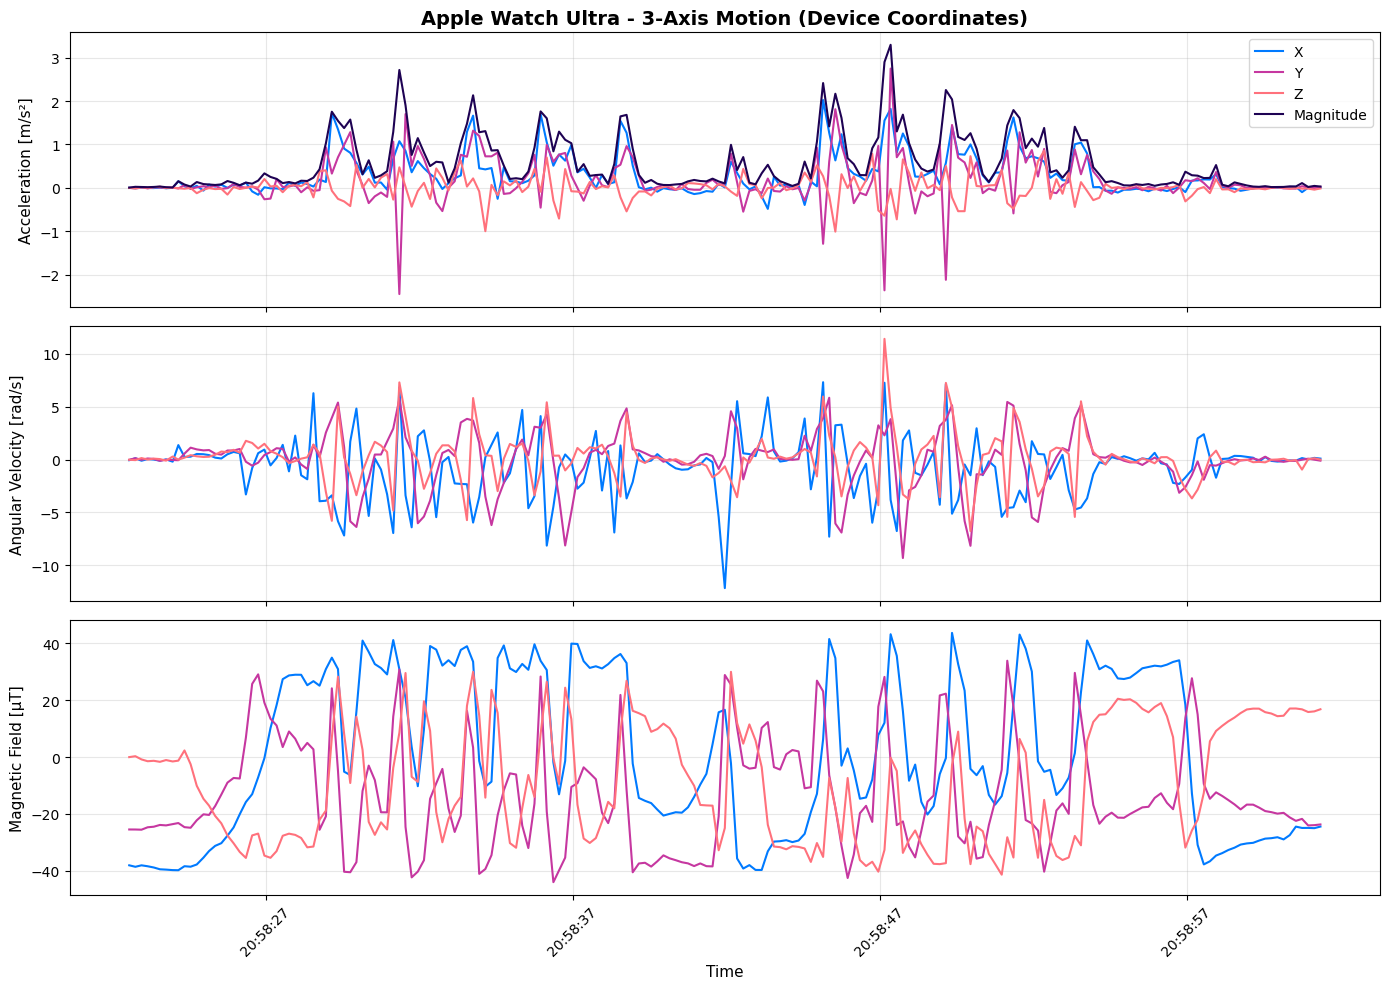

In [5]:
# Plot individual acceleration components (Device Coordinates)
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Acceleration
axes[0].plot(motion['timestamp'], motion['accelerationX'], motion['timestamp'], motion['accelerationY'], motion['timestamp'], motion['accelerationZ'])
axes[0].plot(motion['timestamp'], np.sqrt(motion['accelerationX']**2+ motion['accelerationY']**2 + motion['accelerationZ']**2))
axes[0].set_ylabel('Acceleration [m/s²]', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Apple Watch Ultra - 3-Axis Motion (Device Coordinates)', fontsize=14, fontweight='bold')
axes[0].legend(["X", "Y", "Z", "Magnitude"])

# Y-axis acceleration
axes[1].plot(motion['timestamp'], motion['angularVelocityX'], motion['timestamp'], motion['angularVelocityY'], motion['timestamp'], motion['angularVelocityZ'])
axes[1].set_ylabel('Angular Velocity [rad/s]', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Z-axis acceleration
axes[2].plot(motion['timestamp'], motion['magneticFieldX'], motion['timestamp'], motion['magneticFieldY'], motion['timestamp'], motion['magneticFieldZ'])
axes[2].set_ylabel('Magnetic Field [µT]', fontsize=11)
axes[2].set_xlabel('Time', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Format x-axis to show times nicely
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
axes[2].xaxis.set_major_locator(mdates.SecondLocator(interval=10))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Plot the submersion data

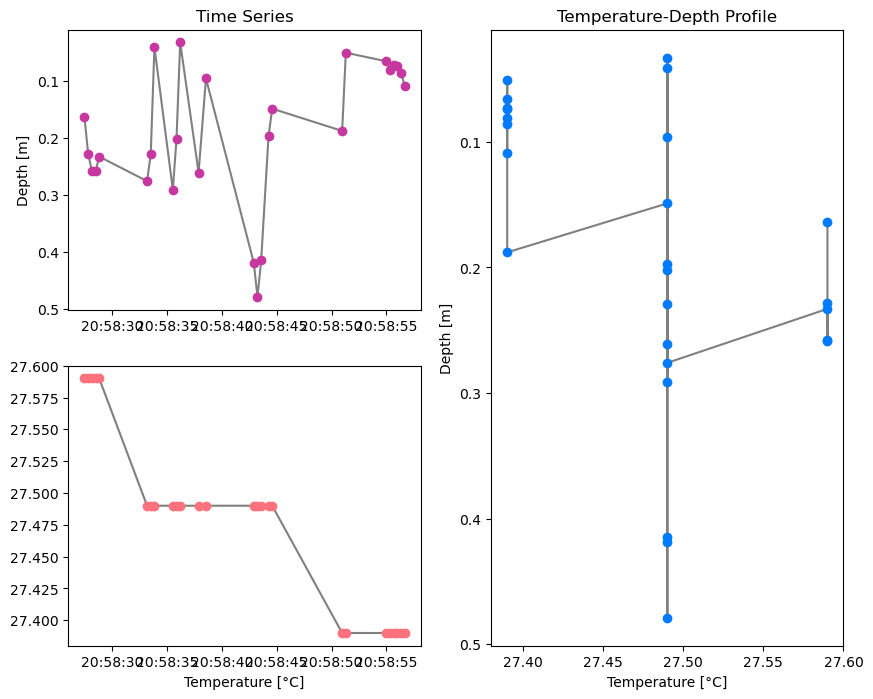

In [41]:
# bring in the data
time = submersion['timestamp']
t = submersion['temperature']
d = submersion['depth']

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the grid specification
gs = gridspec.GridSpec(2, 2)

# Create the left column subplots 
ax1 = fig.add_subplot(gs[0, 0])  
ax2 = fig.add_subplot(gs[1, 0])  

# Create the right column subplot 
ax3 = fig.add_subplot(gs[:, 1]) 

# Plot data on each subplot
ax1.plot(time, d, color = 'gray', marker='o', markerfacecolor=kcolors[1], markeredgecolor=kcolors[1])
ax1.invert_yaxis()
ax1.set_title('Time Series')
ax1.set_ylabel('Depth [m]')

ax2.plot(time, t, color = 'gray', marker='o', markerfacecolor=kcolors[2], markeredgecolor=kcolors[2])
ax2.set_xlabel('Temperature [°C]')

ax3.plot(t, d, color = 'gray', marker='o', markerfacecolor=kcolors[0], markeredgecolor=kcolors[0])
ax3.invert_yaxis()
ax3.set_title('Temperature-Depth Profile')
ax3.set_xlabel('Temperature [°C]')
ax3.set_ylabel('Depth [m]')


plt.show()